<div class="alert alert-block alert-info">
    <h1 align="center">Pandas Mini Project</h1>
    <h2 align="center">Python programming</h2>
    <h3 align="center">Ferdowsi University of Mashhad</3>
    <h4 align="center"><a href="https://t.me/afsharino">Mohammad Afshari</a></h4>
    
</div>

**Step 1: Perform data preparation & cleaning**

* Load the dataset into a data frame using Pandas</br> 
* Explore the number of rows & columns, ranges of values etc.</br>
* Check out the type of the columns
* Handle missing, incorrect and invalid data</br>

<div class="alert alert-block alert-success">
    <h3 align="center">Load the dataset into a data frame using Pandas</h3><br\>
</div>

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("../dataset/appl_1980_2014.csv")

<div class="alert alert-block alert-success">
    <h3 align="center">Explore the number of rows & columns, ranges of values etc</h3><br\>
</div>

In [53]:
df.shape

(8465, 7)

In [54]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8465 non-null   object 
 1   Open       8465 non-null   float64
 2   High       8465 non-null   float64
 3   Low        8465 non-null   float64
 4   Close      8465 non-null   float64
 5   Volume     8465 non-null   int64  
 6   Adj Close  8465 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


In [8]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [55]:
df.tail()

,Date,Open,High,Low,Close,Volume,Adj Close
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
8464,1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45


In [56]:
df.sample(10)

,Date,Open,High,Low,Close,Volume,Adj Close
5604,1992-04-07,61.00,61.25,57.25,57.25,57554000,1.87
1698,2007-10-08,163.49,167.91,162.97,167.91,208982200,22.93
6983,1986-10-23,32.50,33.13,32.50,33.13,30783200,0.52
6663,1988-01-29,41.50,41.75,40.25,41.50,66360000,1.30
2245,2005-08-04,42.89,43.00,42.29,42.71,67326000,5.83
1838,2007-03-20,91.35,91.84,91.06,91.48,122229100,12.49
2101,2006-03-02,68.99,69.99,68.67,69.61,156318400,9.50
473,2012-08-16,631.21,636.76,630.50,636.34,63633500,87.26
7297,1985-07-29,16.63,16.63,16.00,16.00,19437600,0.25
5914,1991-01-16,47.00,50.00,46.75,49.75,97658400,1.61


<div class="alert alert-block alert-success">
    <h3 align="center">Check out the type of the columns</h3><br\>
</div>

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [11]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

<div class="alert alert-block alert-success">
    <h3 align="center">Handle missing, incorrect and invalid data</h3><br\>
</div>

In [60]:
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Volume       False
Adj Close    False
dtype: bool

In [61]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [63]:
df.isna().any()

Date         False
Open         False
High         False
Low          False
Close        False
Volume       False
Adj Close    False
dtype: bool

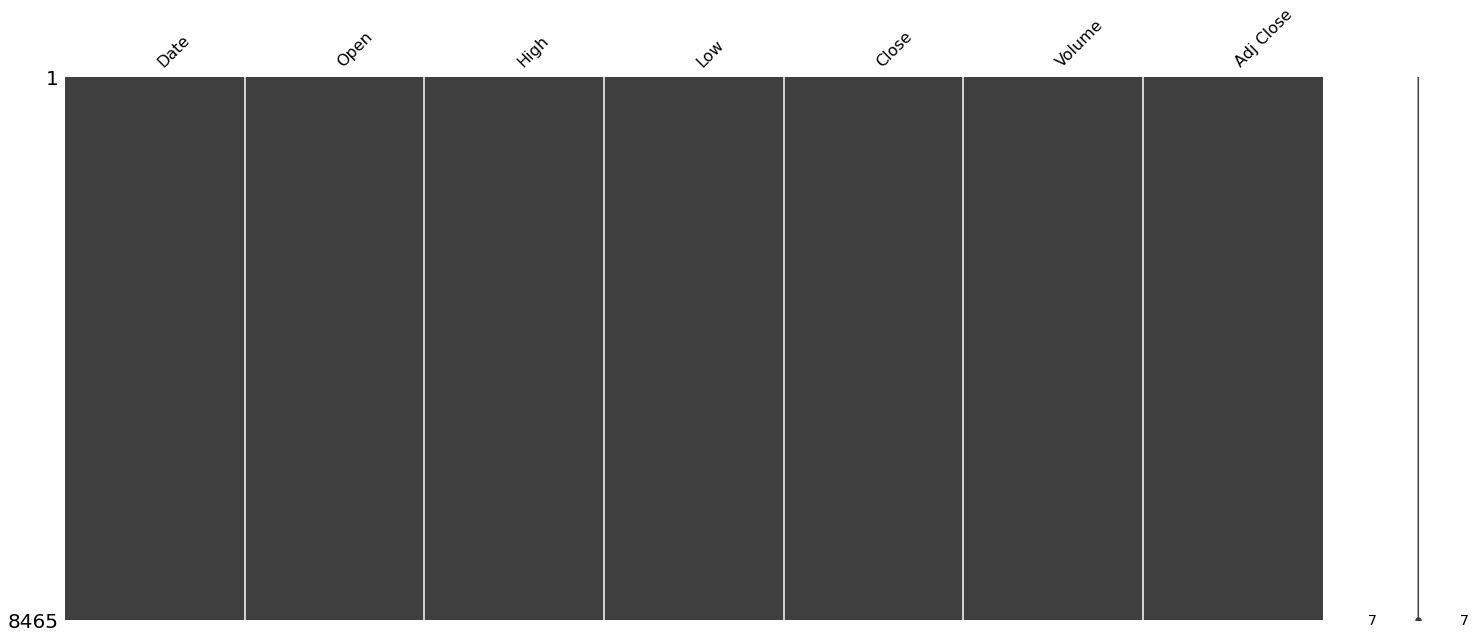

In [70]:
import missingno as msno
msno.matrix(df)
plt.show()

**Step 2: Perform exploratory analysis**</br>
* Compute the mean, sum, range and other interesting statistics for numeric columns</br>
* Adding Date,Month,Day and WeekDay Columns in DataFrame</br>
* Set the date as the index </br>
* Is there any duplicate dates?</br>
* It seems the index is from the most recent date. Make the first entry the oldest date.</br>
* Get the last business day of each month</br>
* What is the difference in days between the first day and the oldest? </br>
* How many months in the data we have?

<div class="alert alert-block alert-success">
    <h4 align="center">Compute the mean, sum, range and other interesting statistics for numeric columns</h4>
</div>

In [71]:
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,8465.000000,8465.000000,8465.000000,8465.000000,8.465000e+03,8465.000000
mean,98.593926,99.848683,97.226790,98.549199,9.391214e+07,11.095014
std,141.965350,143.155674,140.548326,141.877244,8.993202e+07,21.133016
min,11.120000,11.120000,11.000000,11.000000,2.504000e+05,0.170000
25%,25.750000,26.000000,25.120000,25.630000,3.704960e+07,0.900000
50%,40.750000,41.500000,40.000000,40.750000,6.636000e+07,1.410000
75%,79.500000,81.000000,78.740000,80.000000,1.177701e+08,8.660000
max,702.410000,705.070000,699.570000,702.100000,1.855410e+09,96.280000


In [72]:
df["Volume"].mean()

93912144.6662729

In [73]:
df["Volume"].sum()

794966304600

In [74]:
df["Volume"].min()

250400

In [75]:
df["Volume"].max()

1855410200

In [76]:
df["High"].min()

11.12

In [77]:
df["Close"].mean()

98.54919905493229

In [78]:
df["Open"].max()

702.41

<AxesSubplot:>

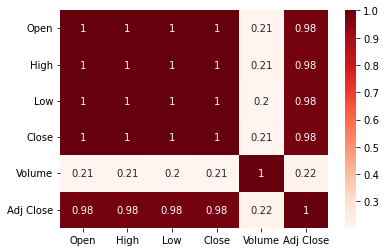

In [79]:
import seaborn as sns
correlation_df = df.corr()
sns.heatmap(correlation_df,cmap='Reds' , annot=True)

<div class="alert alert-block alert-success">
    <h3 align="center">Adding Year,Month,Day and WeekDay Columns in DataFrame</h3>
</div>

In [80]:
df['Year'] = df.apply(lambda row:row.Date.split("-")[0],axis=1)
df['Month'] = df.apply(lambda row:row.Date.split("-")[1],axis=1)
df['Day'] = df.apply(lambda row:int(row.Date.split("-")[2]),axis=1)

import datetime
df['WeekDay'] = df.apply(lambda row:datetime.datetime.strptime(row.Date, '%Y-%M-%d').strftime('%A'),axis=1)
df.sample(10)

,Date,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day,WeekDay
4596,1996-04-02,25.63,25.63,24.87,25.00,25359600,0.85,1996,04,2,Tuesday
4112,1998-03-04,22.87,24.75,22.87,24.44,204456000,0.83,1998,03,4,Sunday
7845,1983-05-26,60.00,60.37,58.88,59.38,26392800,0.93,1983,05,26,Wednesday
5360,1993-03-25,53.75,54.75,53.50,54.75,42761600,1.80,1993,03,25,Monday
5633,1992-02-26,68.25,70.00,68.25,69.88,57271200,2.28,1992,02,26,Sunday
6987,1986-10-17,33.75,34.00,33.37,33.63,37968000,0.52,1986,10,17,Friday
3377,2001-01-31,21.50,22.50,21.44,21.62,182676200,1.48,2001,01,31,Wednesday
3324,2001-04-18,21.57,24.08,21.08,22.79,275210600,1.56,2001,04,18,Thursday
5005,1994-08-19,34.75,35.00,34.25,34.88,32636800,1.17,1994,08,19,Wednesday
1964,2006-09-15,74.60,74.98,73.29,74.10,245463400,10.12,2006,09,15,Sunday


<div class="alert alert-block alert-success">
    <h3 align="center">Set the date as the index</h3>
</div>

In [81]:
df.set_index('Date', inplace=True)

In [82]:
df

,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day,WeekDay
Date,,,,,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35,2014,07,8,Wednesday
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97,2014,07,7,Tuesday
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014,07,3,Friday
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,2014,07,2,Thursday
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,2014,07,1,Wednesday
...,...,...,...,...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,1980,12,18,Friday
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,1980,12,17,Thursday
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,1980,12,16,Wednesday


<div class="alert alert-block alert-success">
    <h3 align="center">Is there any duplicate dates?</h3>
</div>

In [83]:
df.index.duplicated().any()

False

<div class="alert alert-block alert-success">
    <h4 align="center">it seems the index is from the most recent date. Make the first entry the oldest date.</h4>
</div>

In [84]:
df.sort_index()

,Open,High,Low,Close,Volume,Adj Close,Year,Month,Day,WeekDay
Date,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45,1980,12,12,Saturday
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42,1980,12,15,Tuesday
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39,1980,12,16,Wednesday
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40,1980,12,17,Thursday
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41,1980,12,18,Friday
...,...,...,...,...,...,...,...,...,...,...
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52,2014,07,1,Wednesday
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48,2014,07,2,Thursday
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03,2014,07,3,Friday


<div class="alert alert-block alert-success">
    <h3 align="center">Get the last business day of each month</h3>
</div>

In [85]:
df.groupby(['Month','Year']).max().get(['Day','WeekDay'])

Day    WeekDay
Month Year                
01    1981   30  Wednesday
      1982   29  Wednesday
      1983   31  Wednesday
      1984   31  Wednesday
      1985   31  Wednesday
...         ...        ...
12    2009   31  Wednesday
      2010   31  Wednesday
      2011   30  Wednesday
      2012   31  Wednesday
      2013   31  Wednesday

[404 rows x 2 columns]

<div class="alert alert-block alert-success">
    <h3 align="center">What is the difference in days between the first day and the oldest?</h3>
</div>

In [86]:
dates = pd.to_datetime(df.index)
(dates[0]-dates[-1]).days

12261

<div class="alert alert-block alert-success">
    <h3 align="center">How many months in the data we have?</h3><br\>
</div>

In [87]:
len(df.groupby(['Year', 'Month']))

404